In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("marketing_campaign_dataset.csv",header=0)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [3]:
df["Duration"].unique()
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [4]:
def convert_duration(duration):

    return int((duration).replace(" days",""))

def convert_acquisition(acquisition_cost):

    return float(acquisition_cost.replace("$","").replace(",",""))

df=df.copy()
df["Duration"]=df["Duration"].apply(convert_duration)
df["Acquisition_Cost"]=df["Acquisition_Cost"].apply(convert_acquisition)
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  int64         
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

In [6]:
#df.select_dtypes(exclude=["object","datetime"]).drop(axis=1).corr()
def convert_to_bins(column,num):
    minn=column.min()
    maxx=column.max()
    step=(maxx-minn)/num
    bins=[minn+(i*step) for i in range(num)]+[maxx]
    return pd.cut(column,bins=bins,labels=list(range(num)),include_lowest=True)

In [7]:
df["Clicks_by_Impression"]=df["Clicks"]/df["Impressions"]
#df["Acquisition_Cost_Bins"]=convert_to_bins(df["Acquisition_Cost"],5).astype(int)
#df.info()
df1=df.drop(["Campaign_ID","Company","Clicks","Date","Impressions"],axis=1)



df1=pd.get_dummies(df1,columns=["Campaign_Type","Target_Audience","Location","Language","Channel_Used",
                               "Customer_Segment"],drop_first=True)

df1.head()

,Duration,Conversion_Rate,Acquisition_Cost,ROI,Engagement_Score,Month,Year,Clicks_by_Impression,Campaign_Type_Email,Campaign_Type_Influencer,...,Language_Spanish,Channel_Used_Facebook,Channel_Used_Google Ads,Channel_Used_Instagram,Channel_Used_Website,Channel_Used_YouTube,Customer_Segment_Foodies,Customer_Segment_Health & Wellness,Customer_Segment_Outdoor Adventurers,Customer_Segment_Tech Enthusiasts
0,30,0.04,16174.0,6.29,6,1,2021,0.263267,True,False,...,True,False,True,False,False,False,False,True,False,False
1,60,0.12,11566.0,5.61,7,1,2021,0.015419,True,False,...,False,False,True,False,False,False,False,False,False,False
2,30,0.07,10200.0,7.18,1,1,2021,0.075864,False,True,...,False,False,False,False,False,True,False,False,True,False
3,60,0.11,12724.0,5.55,7,1,2021,0.119231,False,False,...,False,False,False,False,False,True,False,True,False,False
4,15,0.05,16452.0,6.50,3,1,2021,0.090217,True,False,...,False,False,False,False,False,True,False,True,False,False


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 33 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Duration                              200000 non-null  int64  
 1   Conversion_Rate                       200000 non-null  float64
 2   Acquisition_Cost                      200000 non-null  float64
 3   ROI                                   200000 non-null  float64
 4   Engagement_Score                      200000 non-null  int64  
 5   Month                                 200000 non-null  int32  
 6   Year                                  200000 non-null  int32  
 7   Clicks_by_Impression                  200000 non-null  float64
 8   Campaign_Type_Email                   200000 non-null  bool   
 9   Campaign_Type_Influencer              200000 non-null  bool   
 10  Campaign_Type_Search                  200000 non-null  bool   
 11  

In [9]:
def get_bool_columns(df):
    columns=df.columns
    bool_columns=[]
    for col in columns:
        if df[col].dtype=="bool":
            bool_columns.append(col)

    return bool_columns
bool_columns=get_bool_columns(df1)
df1[bool_columns]=df1[bool_columns].apply(lambda x:x.astype(int))

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 33 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Duration                              200000 non-null  int64  
 1   Conversion_Rate                       200000 non-null  float64
 2   Acquisition_Cost                      200000 non-null  float64
 3   ROI                                   200000 non-null  float64
 4   Engagement_Score                      200000 non-null  int64  
 5   Month                                 200000 non-null  int32  
 6   Year                                  200000 non-null  int32  
 7   Clicks_by_Impression                  200000 non-null  float64
 8   Campaign_Type_Email                   200000 non-null  int64  
 9   Campaign_Type_Influencer              200000 non-null  int64  
 10  Campaign_Type_Search                  200000 non-null  int64  
 11  

In [11]:
import xgboost as xgb

x=df1.select_dtypes(include=["int"]).drop(["Engagement_Score"],axis=1)
def show_feature_importance(column_name,minn,maxx,x,df1):
    model=xgb.XGBRegressor(objective="reg:squarederror",n_estimators=600,learning_rate=0.03,max_depth=7)
    diff=maxx-minn
    
    y=df1[column_name]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    #print(model.get_booster().get_score(importance_type='gain'))
    print("Error :- ",mean_squared_error(np.expm1(y_test),np.expm1(y_pred)))
    xgb.plot_importance(model, importance_type='gain')
    plt.show()
def normalization(column):
    minn=column.min()
    maxx=column.max()
    diff=maxx-minn
    #return minn,maxx,column.apply(lambda x:(x-minn)/diff)
    return minn,maxx,np.log1p(column)
def reverse_normalization(minn,maxx,column):
    diff=maxx-minn
    return column.apply(lambda x: ((diff*x)+minn))

min_conversion,max_conversion,df1["Conversion_Rate"]=normalization(df1["Conversion_Rate"])
min_duration,max_duration,df1["Duration"]=normalization(df1["Duration"])
min_duration,max_duration,df1["Month"]=normalization(df1["Month"])
min_duration,max_duration,df1["Year"]=normalization(df1["Year"])


min_acquisition,max_acquisition,df1["Acquisition_Cost"]=normalization(df1["Acquisition_Cost"])
min_roi,max_roi,df1["ROI"]=normalization(df1["ROI"])
min_engagement,max_engagement,df1["Engagement_Score"]=normalization(df1["Engagement_Score"])
min_cbi,max_cbi,df1["Clicks_by_Impression"]=normalization(df1["Clicks_by_Impression"])


In [12]:
print(min_conversion,max_conversion)
show_feature_importance("Conversion_Rate",min_conversion,max_conversion,x,df1)

0.01 0.15
Error :-  0.0016660341364753905


5000.0 20000.0
Error :-  19725458.978743926


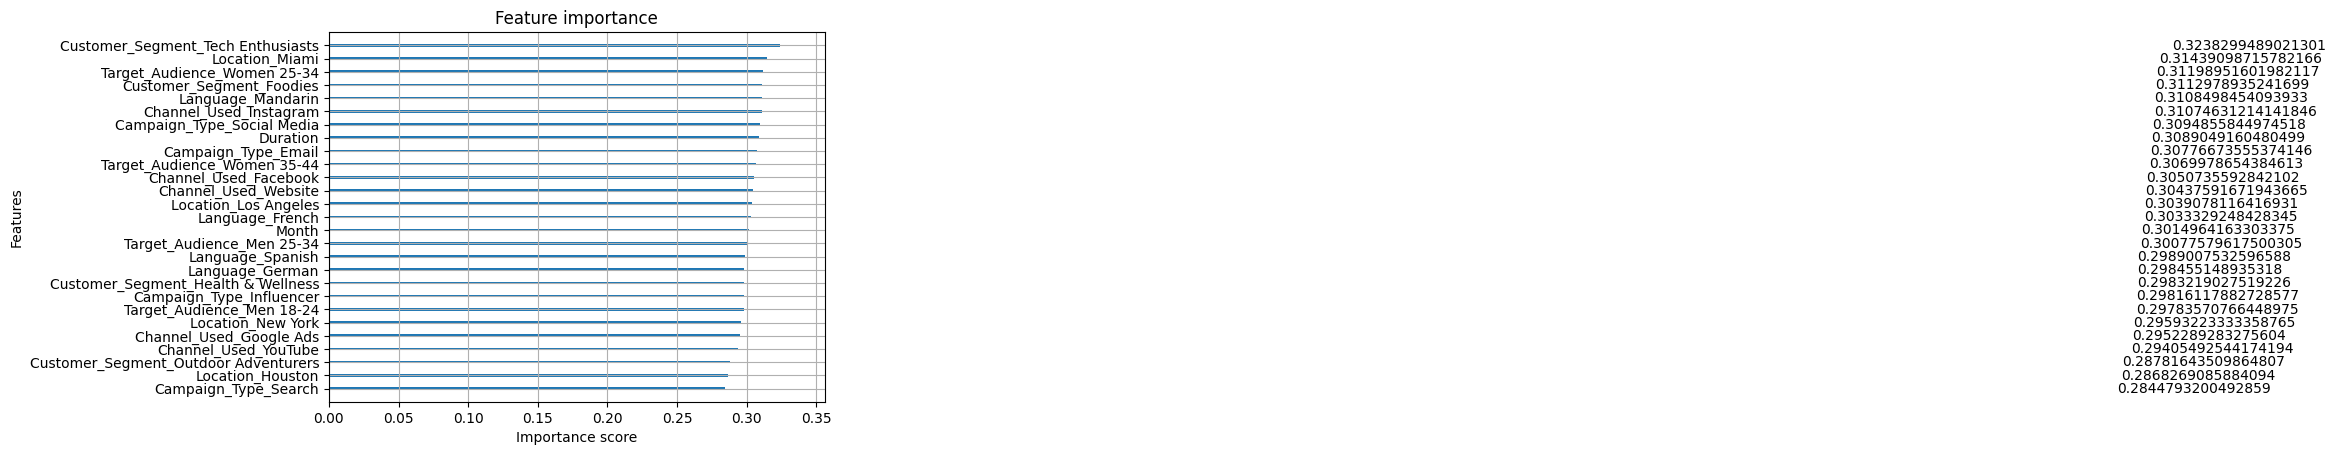

In [13]:
print(min_acquisition,max_acquisition)
show_feature_importance("Acquisition_Cost",min_acquisition,max_acquisition,x,df1)

2.0 8.0
Error :-  3.128831548199381


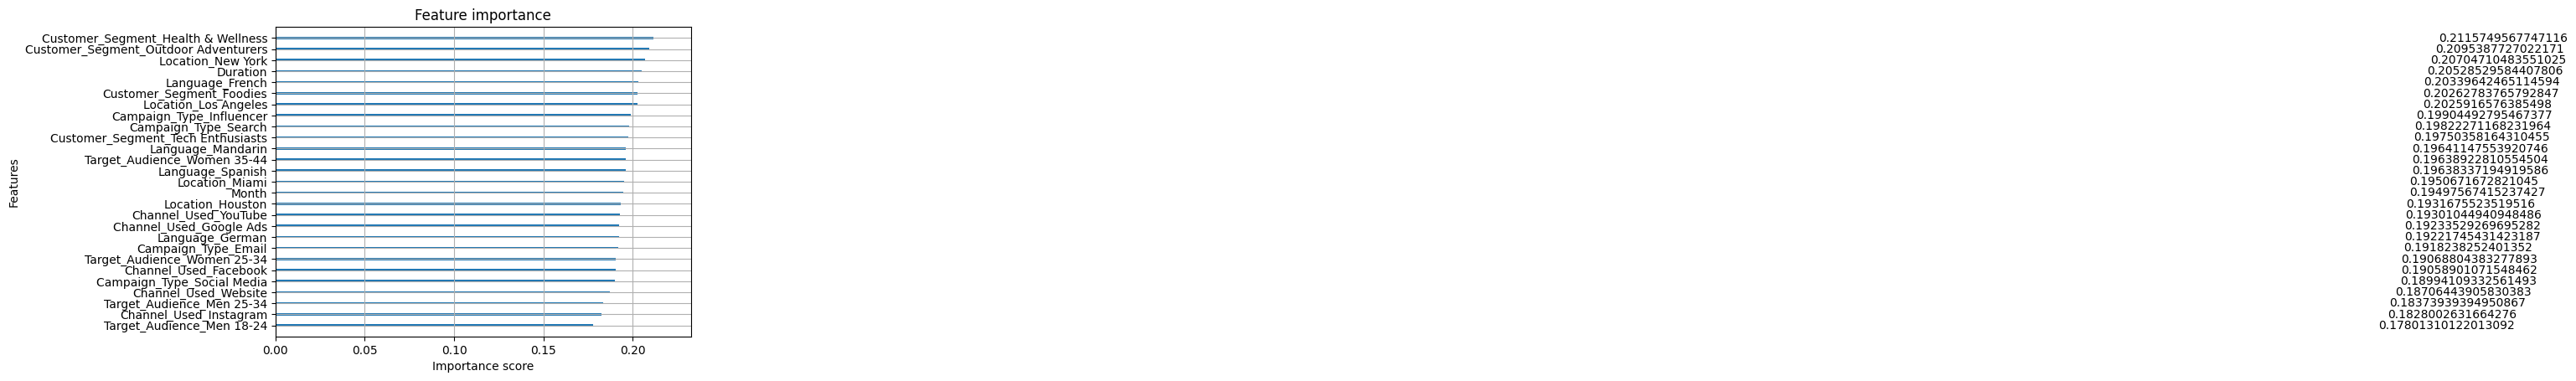

In [14]:
print(min_roi,max_roi)
#ROI, ENGAGEMENT_sCORE, Click_by_Impression
show_feature_importance("ROI",min_roi,max_roi,x,df1)

1 10
Error :-  8.890915001107846


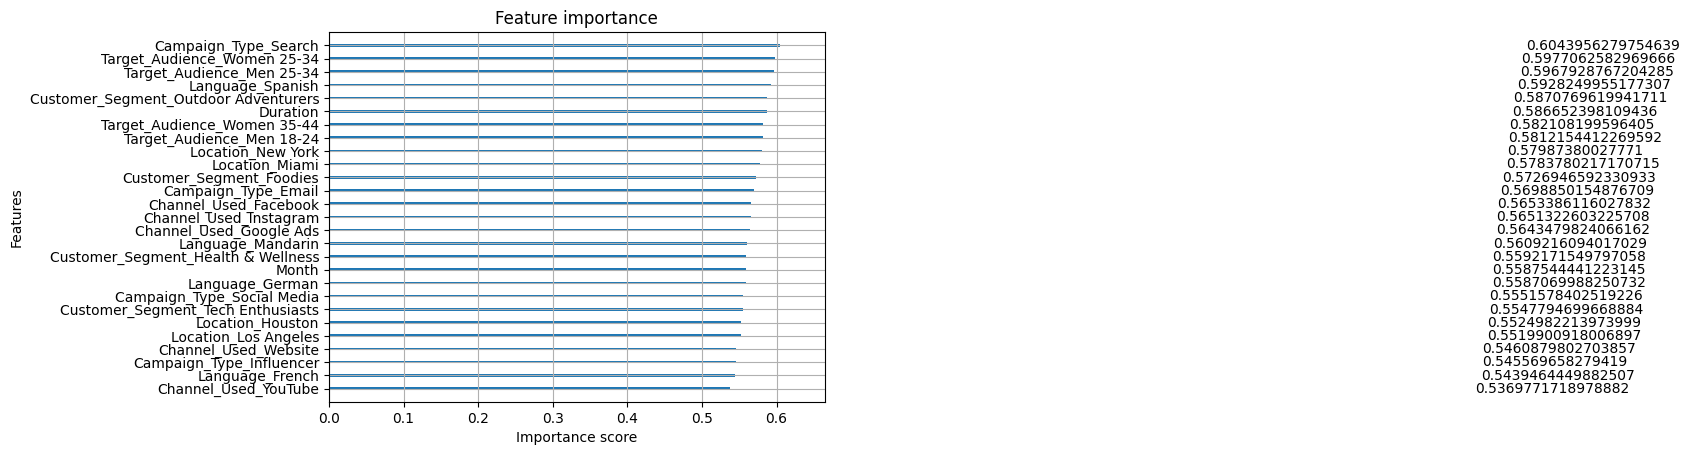

In [15]:
print(min_engagement,max_engagement)
show_feature_importance("Engagement_Score",min_engagement,max_engagement,x,df1)

0.010054293183189221 0.9920239282153539
Error :-  0.017389523652263362


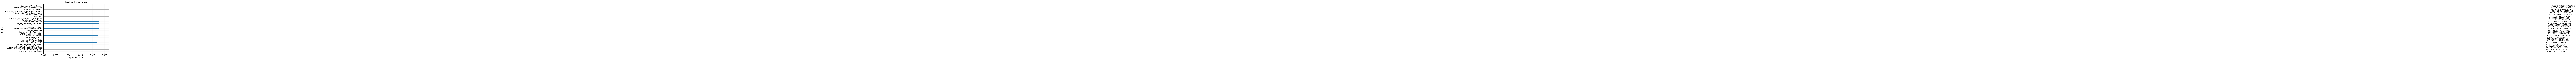

In [16]:
print(min_cbi,max_cbi)
show_feature_importance("Clicks_by_Impression",min_cbi,max_cbi,x,df1)

In [17]:
#Engagement Score,ROI and Acquisition_Cost couldnt be predicted efficiently via XGBoost model
#Clicks/Impression and Conversion_Rate prediction performed well
df.groupby("Company")["Acquisition_Cost"].mean()

Company
Alpha Innovations      12513.595690
DataTech Solutions     12503.275617
Innovate Industries    12500.535622
NexGen Systems         12495.224075
TechCorp               12509.263812
Name: Acquisition_Cost, dtype: float64